Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


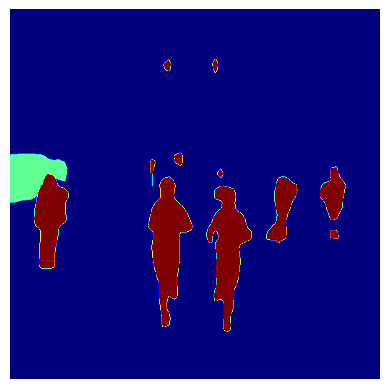

In [14]:
import torch
from torchvision import transforms
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# Load DeepLabV3 model
model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet101', pretrained=True)
model.eval()

# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((512, 512)),  # Adjust the size as needed
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Function to perform image segmentation
def segment_image(image_path):
    # Load the image
    response = requests.get(image_path)
    img = Image.open(BytesIO(response.content)).convert("RGB")

    # Apply transformations
    img_tensor = transform(img).unsqueeze(0)  # Add batch dimension

    # Perform segmentation
    with torch.no_grad():
        output = model(img_tensor)['out'][0]

    # Get the predicted segmentation mask
    mask = output.argmax(0)

    # Display the segmentation mask
    plt.imshow(mask, cmap='jet')  # You can adjust the colormap as needed
    plt.axis('off')
    plt.show()

# URL of the image
image_url = "https://drive.google.com/uc?id=16NybAvrjTcPVbSYxznlzoESWmPSCFlD_"

# Perform image segmentation
segment_image(image_url)


<ipython-input-5-b2bdf473c150>:25: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(BytesIO(response.content))


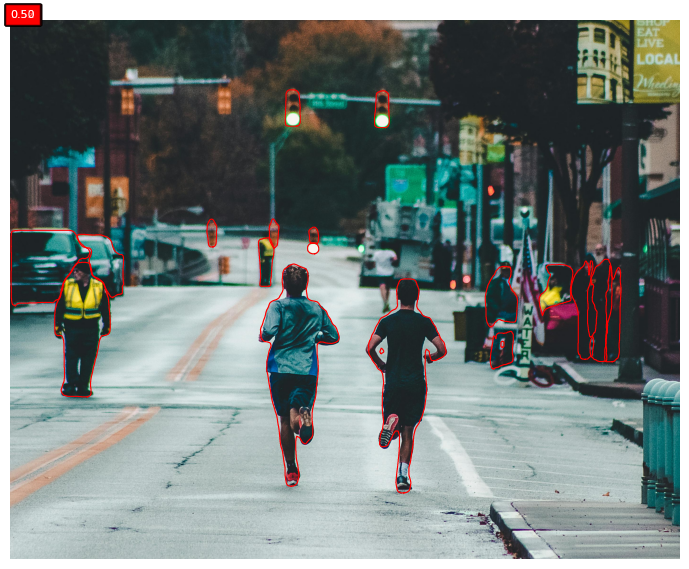

In [5]:
import torch
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import imageio
from skimage.measure import find_contours

# Define the configuration for the Mask R-CNN model
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Set threshold for object detection
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")

# Create the Mask R-CNN predictor
predictor = DefaultPredictor(cfg)

# Function to perform instance segmentation
def segment_image(image_url):
    # Load the image using imageio
    response = requests.get(image_url)
    img = imageio.imread(BytesIO(response.content))

    # Perform instance segmentation
    predictions = predictor(img)

    # Display the segmentation results
    plt.figure(figsize=(10, 7))
    plt.imshow(img)
    ax = plt.gca()
    for score, label, mask in zip(predictions["instances"].scores, predictions["instances"].pred_classes, predictions["instances"].pred_masks):
        mask = mask.mul(255).byte().cpu().numpy()
        contours = find_contours(mask, 0.5)
        for contour in contours:
            ax.plot(contour[:, 1], contour[:, 0], linewidth=0.8, color='r')
        ax.text(0, -10, f'{score:.2f}', bbox=dict(facecolor='red', alpha=0.5), fontsize=8, color='white')
    plt.axis('off')
    plt.show()

# URL of the image
image_url = "https://drive.google.com/uc?id=16NybAvrjTcPVbSYxznlzoESWmPSCFlD_"

# Perform instance segmentation
segment_image(image_url)


<ipython-input-8-f5f7fdb5219e>:25: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(BytesIO(response.content))


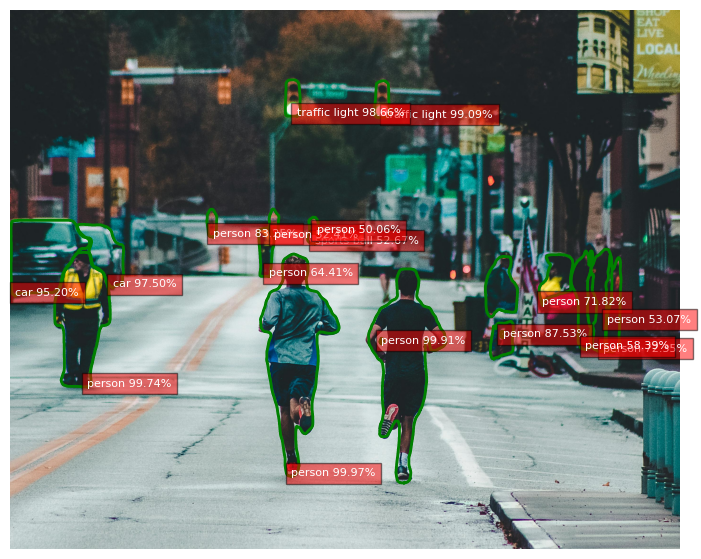

In [8]:
import torch
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import imageio
from skimage.measure import find_contours

# Define the configuration for the Mask R-CNN model
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Set threshold for object detection
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")

# Create the Mask R-CNN predictor
predictor = DefaultPredictor(cfg)

# Function to perform instance segmentation
def segment_image(image_url):
    # Load the image using imageio
    response = requests.get(image_url)
    img = imageio.imread(BytesIO(response.content))

    # Perform instance segmentation
    predictions = predictor(img)

    # Display the segmentation results
    plt.figure(figsize=(10, 7))
    plt.imshow(img)
    ax = plt.gca()
    for score, label, mask in zip(predictions["instances"].scores, predictions["instances"].pred_classes, predictions["instances"].pred_masks):
        mask = mask.mul(255).byte().cpu().numpy()
        contours = find_contours(mask, 0.5)
        for contour in contours:
            ax.plot(contour[:, 1], contour[:, 0], linewidth=2, color='g')
        # Get the class name from COCO dataset
        class_name = predictor.metadata.thing_classes[label]
        # Add text annotation with class name and accuracy percentage
        ax.text(contour[0, 1], contour[0, 0], f'{class_name} {score*100:.2f}%', bbox=dict(facecolor='red', alpha=0.5), fontsize=8, color='white')
    plt.axis('off')
    plt.show()

# URL of the image
image_url = "https://drive.google.com/uc?id=16NybAvrjTcPVbSYxznlzoESWmPSCFlD_"

# Perform instance segmentation
segment_image(image_url)


<ipython-input-11-cce3604c5493>:25: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(BytesIO(response.content))


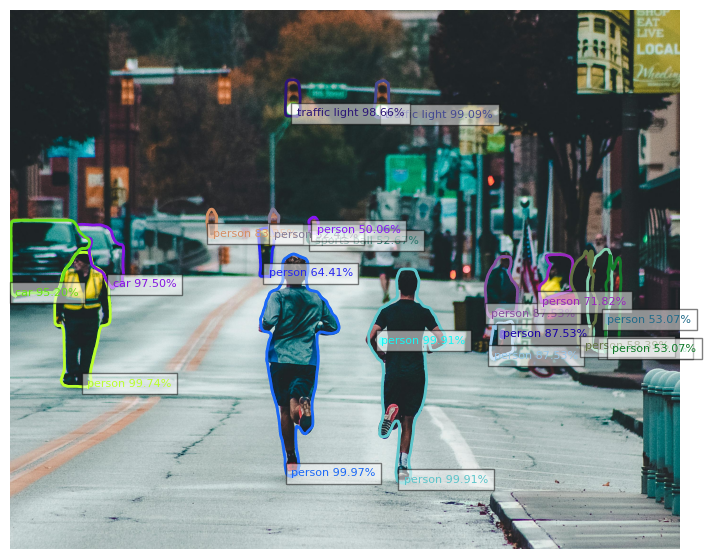

In [11]:
import torch
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import imageio
from skimage.measure import find_contours

# Define the configuration for the Mask R-CNN model
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Set threshold for object detection
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")

# Create the Mask R-CNN predictor
predictor = DefaultPredictor(cfg)

# Function to perform instance segmentation
def segment_image(image_url):
    # Load the image using imageio
    response = requests.get(image_url)
    img = imageio.imread(BytesIO(response.content))

    # Perform instance segmentation
    predictions = predictor(img)

    # Display the segmentation results
    plt.figure(figsize=(10, 7))
    plt.imshow(img)
    ax = plt.gca()
    for score, label, mask in zip(predictions["instances"].scores, predictions["instances"].pred_classes, predictions["instances"].pred_masks):
        mask = mask.mul(255).byte().cpu().numpy()
        contours = find_contours(mask, 0.5)
        for contour in contours:
            # Get a unique color for each object
            color = np.random.rand(3,)
            ax.plot(contour[:, 1], contour[:, 0], linewidth=2, color=color)
            # Get the class name from COCO dataset
            class_name = predictor.metadata.thing_classes[label]
            # Add text annotation with class name and accuracy percentage
            ax.text(contour[0, 1], contour[0, 0], f'{class_name} {score*100:.2f}%', bbox=dict(facecolor='white', alpha=0.5), fontsize=8, color=color)
    plt.axis('off')
    plt.show()

# URL of the image
image_url = "https://drive.google.com/uc?id=16NybAvrjTcPVbSYxznlzoESWmPSCFlD_"

# Perform instance segmentation
segment_image(image_url)
